In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [4]:
read_athlete<-read_csv("https://raw.githubusercontent.com/Mahekbhardwaj/dsci-private/main/athlete_events_full.csv?token=GHSAT0AAAAAACLEYHGYUH2ONM5OIDTSMEYGZLRTGJQ")
head(read_athlete)
tail(read_athlete)

Rows: 99999 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal
dbl  (5): ID, Age, Height, Weight, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
50600,Huang Chung-Yi,M,36,174,85,Chinese Taipei,TPE,2004 Summer,2004,Summer,Athina,Baseball,Baseball Men's Baseball,NA
50601,"Yao Xi ""Crystal"" Huang",F,29,160,50,United States,USA,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Singles,NA
50601,"Yao Xi ""Crystal"" Huang",F,29,160,50,United States,USA,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Women's Team,NA
50602,Huang Cunguang,M,26,172,75,China,CHN,2012 Summer,2012,Summer,London,Canoeing,"Canoeing Men's Kayak Singles, Slalom",NA
50603,Huang Dongjie,F,26,175,67,China,CHN,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,NA
50604,Huang Dongyan,F,22,172,63,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,Cycling Women's Team Pursuit,NA


In [5]:
#choosing a sport- we chose swimming
sports<-read_athlete|> group_by(Sport) |> summarize(count=n()) 
head(sports)
tail(sports)

Sport,count
<chr>,<int>
Alpine Skiing,3493
Alpinism,7
Archery,830
Art Competitions,1445
Athletics,14678
Badminton,455


Sport,count
<chr>,<int>
Triathlon,205
Tug-Of-War,62
Volleyball,1149
Water Polo,1472
Weightlifting,1355
Wrestling,2552


In [6]:
#selecting only athletics sport
athlete<-read_athlete|> filter(Sport=="Swimming",Year==2016)
head(athlete)
tail(athlete)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
430,Matthew Duncan Abeysinghe,M,20,180,74,Sri Lanka,SRI,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NA
465,"Matthew ""Matt"" Abood",M,30,197,92,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,NA
465,"Matthew ""Matt"" Abood",M,30,197,92,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
578,Bourhan Abro,M,21,180,70,Djibouti,DJI,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,NA
650,Javier Carlos Acevedo,M,18,182,68,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Backstroke,NA
650,Javier Carlos Acevedo,M,18,182,68,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NA


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
50170,Katinka Hossz,F,27,175,65,Hungary,HUN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 400 metres Individual Medley,Gold
50200,Hou Yawen,F,17,181,71,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 800 metres Freestyle,NA
50297,Andriy Andriyovych Hovorov,M,24,190,89,Ukraine,UKR,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,NA
50315,Jade Ashleigh Howard,F,21,182,68,Zambia,ZAM,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,NA
50381,Sidni Hoxha,M,24,193,86,Albania,ALB,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,NA
50581,Hu Yixuan,M,21,185,83,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Individual Medley,NA


In [7]:
#number of times each person has been to olympics
olymp_num<- athlete|> group_by(ID,Name,Age,Height,Weight) |> summarize(olympics_events_attended=n()) 
olymp_num

`summarise()` has grouped output by 'ID', 'Name', 'Age', 'Height'. You can
override using the `.groups` argument.


ID,Name,Age,Height,Weight,olympics_events_attended
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
430,Matthew Duncan Abeysinghe,20,180,74,1
465,"Matthew ""Matt"" Abood",30,197,92,2
578,Bourhan Abro,21,180,70,1
650,Javier Carlos Acevedo,18,182,68,2
720,Marcelo Alberto Acosta Jimnez,20,NA,NA,3
811,Natalie Cammile Adams (-Brannan),24,173,65,1
1017,Nathan Ghar-Jun Adrian,27,198,100,4
1052,Jasper Aerents,23,191,86,2
1087,Evelina Afoa,17,162,60,1


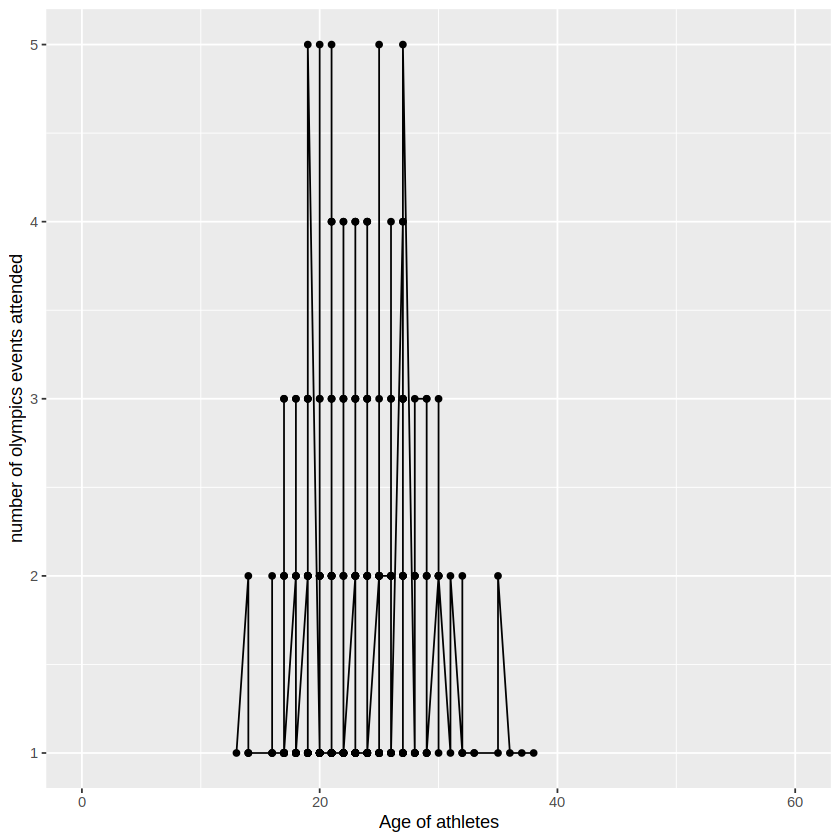

In [8]:
#plot of age vs number of olympic events attended
event_age_plot<-olymp_num|>
                ggplot(aes(y=olympics_events_attended,x=Age)) +
                geom_point()+ geom_line()+ xlim(0,60)+
                labs(y="number of olympics events attended",x="Age of athletes")
event_age_plot

In [44]:
#number of medals won per athlete
#indexing NA and non-NA values in Medal column to 0 and 1 medals won respectively
athlete$Medal <- ifelse(!is.na(athlete$Medal), 1, athlete$Medal)
head(athlete)
tail(athlete)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
430,Matthew Duncan Abeysinghe,M,20,180,74,Sri Lanka,SRI,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NA
465,"Matthew ""Matt"" Abood",M,30,197,92,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,NA
465,"Matthew ""Matt"" Abood",M,30,197,92,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,1
578,Bourhan Abro,M,21,180,70,Djibouti,DJI,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,NA
650,Javier Carlos Acevedo,M,18,182,68,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Backstroke,NA
650,Javier Carlos Acevedo,M,18,182,68,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NA


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
50170,Katinka Hossz,F,27,175,65,Hungary,HUN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 400 metres Individual Medley,1
50200,Hou Yawen,F,17,181,71,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 800 metres Freestyle,NA
50297,Andriy Andriyovych Hovorov,M,24,190,89,Ukraine,UKR,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,NA
50315,Jade Ashleigh Howard,F,21,182,68,Zambia,ZAM,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,NA
50381,Sidni Hoxha,M,24,193,86,Albania,ALB,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,NA
50581,Hu Yixuan,M,21,185,83,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Individual Medley,NA


In [21]:
athlete_average<- athlete|> group_by(ID,Age,Height,Weight)|> summarize(medalcount = n_distinct(Medal,na.rm = TRUE)) 
head(athlete_average)
tail(athlete_average)

`summarise()` has grouped output by 'ID', 'Age', 'Height'. You can override
using the `.groups` argument.


ID,Age,Height,Weight,medalcount
<dbl>,<dbl>,<dbl>,<dbl>,<int>
430,20,180,74,0
465,30,197,92,1
578,21,180,70,0
650,18,182,68,0
720,20,NA,NA,0
811,24,173,65,0


ID,Age,Height,Weight,medalcount
<dbl>,<dbl>,<dbl>,<dbl>,<int>
50170,27,175,65,1
50200,17,181,71,0
50297,24,190,89,0
50315,21,182,68,0
50381,24,193,86,0
50581,21,185,83,0


In [22]:
#exploratory analysis- creating a table to find the average number of medals won by each age of athelete
#converting medal col to int type
athlete$Medal <- as.integer(athlete$Medal)
athlete_medal<-athlete_average|>
                group_by(Age)|>
                summarize(meanmedalcount=mean(medalcount))
head(athlete_medal)
tail(athlete_medal)

Age,meanmedalcount
<dbl>,<dbl>
13,0.00000000
14,0.00000000
16,0.00000000
17,0.04761905
18,0.05555556
19,0.19230769


Age,meanmedalcount
<dbl>,<dbl>
32,0.25
33,0.00
35,0.50
36,1.00
37,0.00
38,0.00


$y
[1] "number of medals won"

$x
[1] "Age of athletes"

attr(,"class")
[1] "labels"

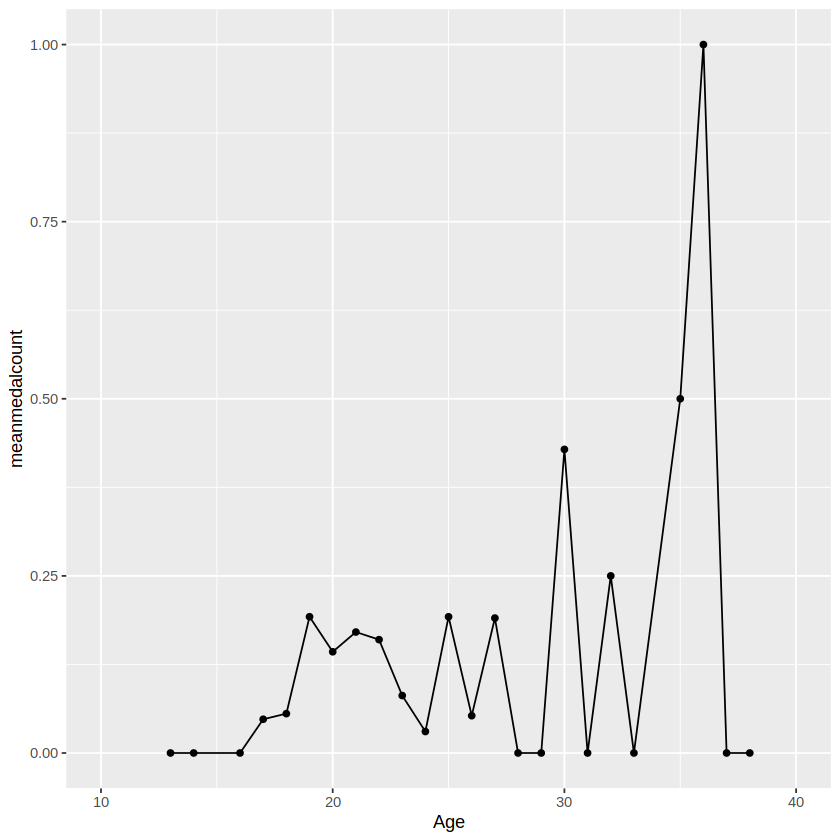

In [23]:
#exploratory analysis- vizualizing average number of medals won against age to see the trend in their relationship.
medal_age_plot<-athlete_medal|>
                ggplot(aes(y=meanmedalcount,x=Age)) +
                geom_point()+ geom_line()+ xlim(10,40)
                labs(y="number of medals won",x="Age of athletes")
medal_age_plot

In [24]:
#now that exploratory analysis is done, we split the data into training and test sets.
mutate(athlete_average,Age=as_factor(Age))
athlete_split <- initial_split(athlete_average, prop = 0.75, strata = Age)
athlete_train <- training(athlete_split)
athlete_test <- testing(athlete_split)

ID,Age,Height,Weight,medalcount
<dbl>,<fct>,<dbl>,<dbl>,<int>
430,20,180,74,0
465,30,197,92,1
578,21,180,70,0
650,18,182,68,0
720,20,NA,NA,0
811,24,173,65,0
1017,27,198,100,1
1052,23,191,86,0
1087,17,162,60,0


In [26]:
#choosing k for knn regression using cross validation
ath_recipe <- recipe(Age ~ Height,Weight,medalcount, data = athlete_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

ath_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
                              set_engine("kknn") |>
                              set_mode("regression")

ath_vfold <- vfold_cv(athlete_train, v = 5, strata = Age)

ath_wkflw <- workflow() |>
  add_recipe(ath_recipe) |>
  add_model(ath_spec)

ath_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [31]:
#add at the start with other libraries
install.packages("kknn")
library(kknn)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [41]:
gridvals <- tibble(neighbors = seq(from = 1, to = 40))

ath_results <- ath_wkflw |>
  tune_grid(resamples = ath_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

ath_results

x Fold1: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ℹ In argument: `.row = orig_rows`.
  Caused by error:
  ! `.row` must be size 51 or 1, not 53.

x Fold2: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ℹ In argument: `.row = orig_rows`.
  Caused by error:
  ! `.row` must be size 50 or 1, not 52.

x Fold3: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ℹ In argument: `.row = orig_rows`.
  Caused by error:
  ! `.row` must be size 50 or 1, not 51.

x Fold5: preprocessor 1/1, model 1/1 (predictions):
  Error in `mutate()`:
  ℹ In argument: `.row = orig_rows`.
  Caused by error:
  ! `.row` must be size 48 or 1, not 50.



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,6.976150,1,NA,Preprocessor1_Model01
2,rmse,standard,5.129213,1,NA,Preprocessor1_Model02
3,rmse,standard,5.141357,1,NA,Preprocessor1_Model03
4,rmse,standard,4.445751,1,NA,Preprocessor1_Model04
5,rmse,standard,4.588477,1,NA,Preprocessor1_Model05
6,rmse,standard,4.889687,1,NA,Preprocessor1_Model06
7,rmse,standard,4.513197,1,NA,Preprocessor1_Model07
8,rmse,standard,4.325313,1,NA,Preprocessor1_Model08
9,rmse,standard,4.284711,1,NA,Preprocessor1_Model09


In [42]:
ath_min <- ath_results |>
  filter(mean == min(mean))

ath_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
36,rmse,standard,3.790294,1,NA,Preprocessor1_Model36
